In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_tecnologia_localidad.csv'

# Carga el archivo CSV en un DataFrame
df_Accesos_tecnologia_local = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Accesos_tecnologia_local.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_tecnologia_localidad.csv:
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0


Resumen de accesos por provincia y tecnología:
       Provincia    Tecnologia    Accesos
1   BUENOS AIRES    CABLEMODEM  2722466.0
3   BUENOS AIRES  FIBRA OPTICA  1849476.0
0   BUENOS AIRES          ADSL   214055.0
7   BUENOS AIRES      WIRELESS   138638.0
4   BUENOS AIRES         OTROS    56102.0
2   BUENOS AIRES       DIAL UP     5900.0
6   BUENOS AIRES         WIMAX     1682.0
5   BUENOS AIRES     SATELITAL     1061.0
9           CABA    CABLEMODEM  1144781.0
11          CABA  FIBRA OPTICA   230402.0
8           CABA          ADSL    54102.0
12          CABA         OTROS    27704.0
14          CABA      WIRELESS     4493.0
10          CABA       DIAL UP     2050.0
13          CABA     SATELITAL       67.0
18     CATAMARCA  FIBRA OPTICA    58355.0
16     CATAMARCA    CABLEMODEM    10303.0
15     CATAMARCA          ADSL     4951.0
21     CATAMARCA      WIRELESS     1384.0
20     CATAMARCA     SATELITAL       79.0

Crecimiento total por tecnología:
     Tecnologia    Accesos
0    CABL

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3228\3751050416.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


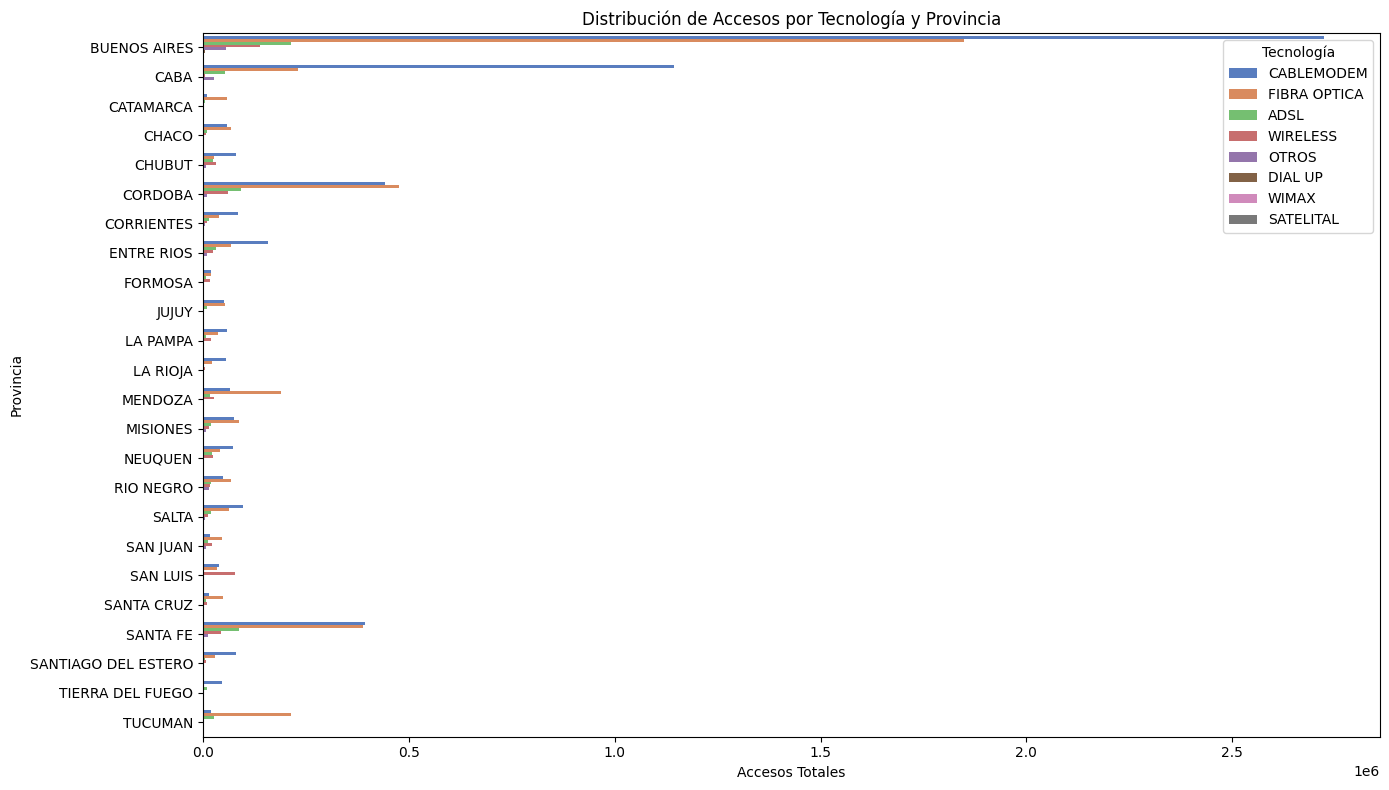

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3228\3751050416.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3228\3751050416.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


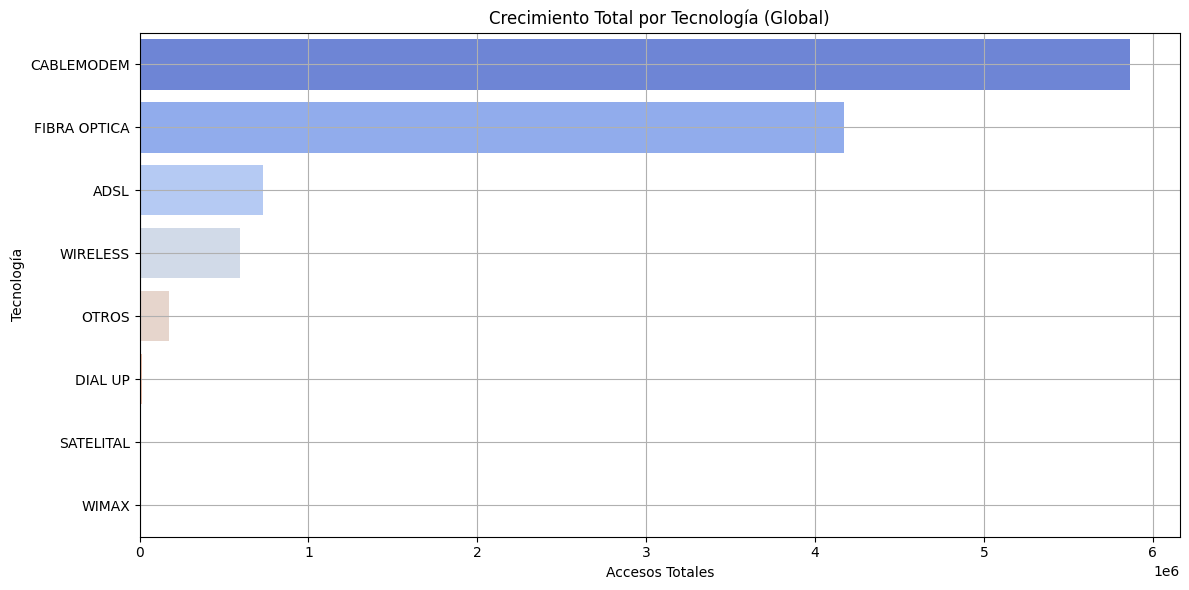

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarnos de que los datos no tengan valores nulos
df_Accesos_tecnologia_local = df_Accesos_tecnologia_local.fillna(0)

# Normalizar nombres de tecnologías a un formato consistente
df_Accesos_tecnologia_local['Tecnologia'] = df_Accesos_tecnologia_local['Tecnologia'].str.upper()

# 1. CREAR UNA TABLA RESUMEN POR PROVINCIA Y TECNOLOGÍA
resumen_provincia_tecnologia = (
    df_Accesos_tecnologia_local.groupby(['Provincia', 'Tecnologia'])['Accesos']
    .sum()
    .reset_index()
)

# Ordenar para identificar los accesos más altos
resumen_provincia_tecnologia = resumen_provincia_tecnologia.sort_values(by=['Provincia', 'Accesos'], ascending=[True, False])

print("Resumen de accesos por provincia y tecnología:")
print(resumen_provincia_tecnologia.head(20))  # Mostrar las primeras filas

# 2. CRECIMIENTO TOTAL POR TECNOLOGÍA
crecimiento_tecnologia = (
    df_Accesos_tecnologia_local.groupby('Tecnologia')['Accesos']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\nCrecimiento total por tecnología:")
print(crecimiento_tecnologia)

# 3. VISUALIZACIÓN: TECNOLOGÍAS PREDOMINANTES POR PROVINCIA
plt.figure(figsize=(14, 8))
sns.barplot(
    data=resumen_provincia_tecnologia,
    x='Accesos',
    y='Provincia',
    hue='Tecnologia',
    ci=None,
    palette='muted'
)
plt.title('Distribución de Accesos por Tecnología y Provincia')
plt.xlabel('Accesos Totales')
plt.ylabel('Provincia')
plt.legend(title='Tecnología')
plt.tight_layout()
plt.show()

# 4. VISUALIZACIÓN: CRECIMIENTO TOTAL POR TECNOLOGÍA
plt.figure(figsize=(12, 6))
sns.barplot(
    data=crecimiento_tecnologia,
    x='Accesos',
    y='Tecnologia',
    ci=None,
    palette='coolwarm'
)
plt.title('Crecimiento Total por Tecnología (Global)')
plt.xlabel('Accesos Totales')
plt.ylabel('Tecnología')
plt.grid()
plt.tight_layout()
plt.show()




In [4]:
# Realizando el análisis informativo del DataFrame
df_Accesos_tecnologia_local.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7753 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB


In [5]:
import pandas as pd

# Carga el archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_tecnologia_localidad.csv'
df = pd.read_csv(archivo_csv)

# Agrupar por 'Tecnologia' y 'Localidad' y calcular la suma de 'Accesos'
accesos_tecnologia_localidad = df.groupby(['Tecnologia', 'Localidad'])['Accesos'].sum().reset_index()

# Mostrar el resultado
print(accesos_tecnologia_localidad.head())

# Guardar en un nuevo archivo CSV (opcional)
accesos_tecnologia_localidad.to_csv('accesos_tecnologia_localidad_agrupados.csv', index=False)


  Tecnologia         Localidad  Accesos
0       ADSL  11 De Septiembre      6.0
1       ADSL     11 de Octubre     32.0
2       ADSL       20 De Junio      4.0
3       ADSL        25 de Mayo    755.0
4       ADSL        9 De Abril     54.0


In [6]:
# Codificar las variables categóricas
df_encoded = pd.get_dummies(accesos_tecnologia_localidad, columns=['Tecnologia', 'Localidad'])

# Calcular la correlación
correlaciones = df_encoded.corr()

# Mostrar las correlaciones
print(correlaciones)


                         Accesos  Tecnologia_ADSL  Tecnologia_CABLEMODEM  \
Accesos                 1.000000        -0.023145               0.122898   
Tecnologia_ADSL        -0.023145         1.000000              -0.143804   
Tecnologia_CABLEMODEM   0.122898        -0.143804               1.000000   
Tecnologia_Cablemodem   0.058938        -0.011729              -0.010003   
Tecnologia_DIAL UP     -0.022749        -0.094745              -0.080799   
...                          ...              ...                    ...   
Localidad_ruta del sol -0.001569         0.016689              -0.005774   
Localidad_Álvarez      -0.001774         0.007015               0.010523   
Localidad_Árraga       -0.002314         0.007015              -0.008166   
Localidad_Ñanducita    -0.001145        -0.004787              -0.004082   
Localidad_Ñorquincó    -0.001168        -0.004787              -0.004082   

                        Tecnologia_Cablemodem  Tecnologia_DIAL UP  \
Accesos           

In [7]:
import pandas as pd

# Carga el archivo CSV (actualiza la ruta si es necesario)
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_tecnologia_localidad.csv'
df = pd.read_csv(archivo_csv)

# Ver las primeras filas del DataFrame para asegurar que todo se carga correctamente
print("Primeras filas del DataFrame:")
print(df.head())

# Agrupar por 'Tecnologia' y 'Localidad' y calcular la suma de 'Accesos'
accesos_tecnologia_localidad = df.groupby(['Tecnologia', 'Localidad'])['Accesos'].sum().reset_index()

# Mostrar los primeros resultados agrupados
print("Relación entre tecnología, localidad y accesos:")
print(accesos_tecnologia_localidad.head())

# Guardar el resultado en un archivo CSV (opcional)
accesos_tecnologia_localidad.to_csv('accesos_tecnologia_localidad_agrupados.csv', index=False)


Primeras filas del DataFrame:
      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0
Relación entre tecnología, localidad y accesos:
  Tecnologia         Localidad  Accesos
0       ADSL  11 De Septiembre      6.0
1       ADSL     11 de Octubre     32.0
2       ADSL       20 De Junio      4.0
3       ADSL        25 de Mayo    755.0
4       ADSL        9 De Abril     54.0


In [8]:
# Codificar las variables categóricas (convertir 'Tecnologia' y 'Localidad' en variables numéricas)
df_encoded = pd.get_dummies(accesos_tecnologia_localidad, columns=['Tecnologia', 'Localidad'])

# Calcular la correlación entre las variables numéricas
correlaciones = df_encoded.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlaciones)


Matriz de correlación:
                         Accesos  Tecnologia_ADSL  Tecnologia_CABLEMODEM  \
Accesos                 1.000000        -0.023145               0.122898   
Tecnologia_ADSL        -0.023145         1.000000              -0.143804   
Tecnologia_CABLEMODEM   0.122898        -0.143804               1.000000   
Tecnologia_Cablemodem   0.058938        -0.011729              -0.010003   
Tecnologia_DIAL UP     -0.022749        -0.094745              -0.080799   
...                          ...              ...                    ...   
Localidad_ruta del sol -0.001569         0.016689              -0.005774   
Localidad_Álvarez      -0.001774         0.007015               0.010523   
Localidad_Árraga       -0.002314         0.007015              -0.008166   
Localidad_Ñanducita    -0.001145        -0.004787              -0.004082   
Localidad_Ñorquincó    -0.001168        -0.004787              -0.004082   

                        Tecnologia_Cablemodem  Tecnologia_DIAL U

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_tecnologia_localidad.csv'
df = pd.read_csv(archivo_csv)

# Agrupar por 'Tecnologia' y 'Localidad' y calcular la suma de 'Accesos'
accesos_tecnologia_localidad = df.groupby(['Tecnologia', 'Localidad'])['Accesos'].sum().reset_index()

# Codificar las variables categóricas ('Tecnologia' y 'Localidad') en variables numéricas
df_encoded = pd.get_dummies(accesos_tecnologia_localidad, columns=['Tecnologia', 'Localidad'])

# Calcular la matriz de correlación
correlaciones = df_encoded.corr()

# Graficar la matriz de correlación con un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Tecnologías, Localidades y Accesos')
plt.show()
